In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [8]:
os.chdir('C:/Users/emirc/Desktop/Yapay_Zeka_Projem/uygulama') 
data_dir = "C:/Users/emirc/Desktop/Yapay_Zeka_Projem/uygulama"
pos_dir = os.path.join(data_dir, "Positive")
neg_dir = os.path.join(data_dir, "Negative")
images = []
labels = []

In [9]:
pos_images = [os.path.join(pos_dir, filename) for filename in os.listdir(pos_dir) if filename.endswith('.jpg')]

neg_images = [os.path.join(neg_dir, filename) for filename in os.listdir(neg_dir) if filename.endswith('.jpg')]

In [10]:
for img_path in pos_images:
    with open(img_path, 'rb') as f:
        img = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_UNCHANGED)
    images.append(img)
    labels.append(1)  # Pozitif sınıf için 1

for img_path in neg_images:
    with open(img_path, 'rb') as f:
        img = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_UNCHANGED)
    images.append(img)
    labels.append(0)  # Negatif sınıf için 0

In [11]:
images = np.array(images)
labels = np.array(labels)

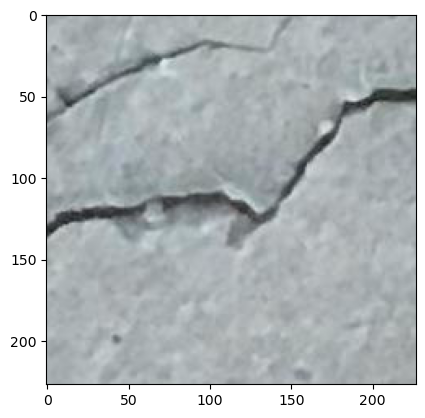

In [13]:
plt.imshow(images[5004])
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

input_shape = (227, 227, 3)
num_classes = 2

In [15]:
model = Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
201/201 [==============================] - 126s 614ms/step - loss: 10.8077 - accuracy: 0.9116 - val_loss: 0.0653 - val_accuracy: 0.9813
Epoch 2/10
201/201 [==============================] - 120s 596ms/step - loss: 0.0578 - accuracy: 0.9828 - val_loss: 0.0388 - val_accuracy: 0.9875
Epoch 3/10
201/201 [==============================] - 125s 624ms/step - loss: 0.5204 - accuracy: 0.9326 - val_loss: 0.3887 - val_accuracy: 0.9688
Epoch 4/10
201/201 [==============================] - 140s 699ms/step - loss: 20.3375 - accuracy: 0.7448 - val_loss: 0.6391 - val_accuracy: 0.5974
Epoch 5/10
201/201 [==============================] - 189s 942ms/step - loss: 0.3586 - accuracy: 0.9059 - val_loss: 0.3613 - val_accuracy: 0.8645
Epoch 6/10
201/201 [==============================] - 172s 857ms/step - loss: 0.2220 - accuracy: 0.9555 - val_loss: 0.2193 - val_accuracy: 0.9395
Epoch 7/10
201/201 [==============================] - 184s 915ms/step - loss: 0.1611 - accuracy: 0.9696 - val_loss: 0.1390

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

os.chdir('C:/Users/emirc/Desktop/Yapay_Zeka_Projem/uygulama') 
data_dir = "C:/Users/emirc/Desktop/Yapay_Zeka_Projem/uygulama"
pos_dir = os.path.join(data_dir, "Positive")
neg_dir = os.path.join(data_dir, "Negative")

images = []
labels = []

pos_images = [os.path.join(pos_dir, filename) for filename in os.listdir(pos_dir) if filename.endswith('.jpg')]
neg_images = [os.path.join(neg_dir, filename) for filename in os.listdir(neg_dir) if filename.endswith('.jpg')]

for img_path in pos_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (227, 227))

    # Filtreleme
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Thresholding
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

    # Morfolojik İşlemler
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    img_morph = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel)

    images.append(img_morph)
    labels.append(1)  # Pozitif sınıf için 1
for img_path in neg_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (227, 227))

    # Filtreleme
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Thresholding
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

    # Morfolojik İşlemler
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    img_morph = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel)

    images.append(img_morph)
    labels.append(0)  # Negatif sınıf için 0

images = np.array(images)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

input_shape = (227, 227, 1)  # Renkli görüntülerden ziyade siyah beyaz görüntülerle çalışıyoruz, bu nedenle kanal sayısı 1 olmalıdır

num_classes = 2
model = Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
201/201 [==============================] - 182s 897ms/step - loss: 7.0858 - accuracy: 0.9137 - val_loss: 0.2178 - val_accuracy: 0.9576
Epoch 2/10
201/201 [==============================] - 179s 890ms/step - loss: 0.0900 - accuracy: 0.9767 - val_loss: 0.1022 - val_accuracy: 0.9719
Epoch 3/10
201/201 [==============================] - 179s 888ms/step - loss: 0.0440 - accuracy: 0.9867 - val_loss: 0.0736 - val_accuracy: 0.9775
Epoch 4/10
201/201 [==============================] - 147s 728ms/step - loss: 0.1021 - accuracy: 0.9799 - val_loss: 0.1139 - val_accuracy: 0.9738
Epoch 5/10
201/201 [==============================] - 158s 785ms/step - loss: 0.0346 - accuracy: 0.9911 - val_loss: 0.1189 - val_accuracy: 0.9700
Epoch 6/10
201/201 [==============================] - 169s 843ms/step - loss: 0.0285 - accuracy: 0.9941 - val_loss: 0.0892 - val_accuracy: 0.9825
Epoch 7/10
201/201 [==============================] - 173s 861ms/step - loss: 0.0094 - accuracy: 0.9980 - val_loss: 0.1112 -

63/63 [==============================] - 20s 305ms/step


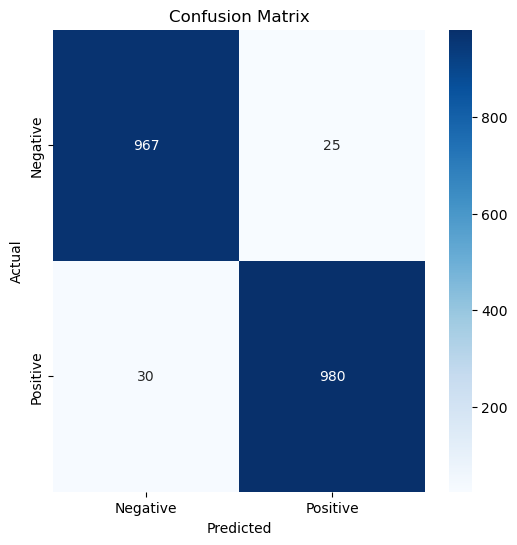

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

# Plot Confusion Matrix
labels = ['Negative', 'Positive']
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()